In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# ***Load Dataset***

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

In [3]:
X.shape


(150, 4)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
names=['sepal length ','sepal width ','petal length ','petal width ']

# ***Show Dataset***

In [6]:
# Create a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=names)
df['target'] = iris.target_names[iris.target]

# Print the dataframe
print(df)

     sepal length   sepal width   petal length   petal width      target
0              5.1           3.5            1.4           0.2     setosa
1              4.9           3.0            1.4           0.2     setosa
2              4.7           3.2            1.3           0.2     setosa
3              4.6           3.1            1.5           0.2     setosa
4              5.0           3.6            1.4           0.2     setosa
..             ...           ...            ...           ...        ...
145            6.7           3.0            5.2           2.3  virginica
146            6.3           2.5            5.0           1.9  virginica
147            6.5           3.0            5.2           2.0  virginica
148            6.2           3.4            5.4           2.3  virginica
149            5.9           3.0            5.1           1.8  virginica

[150 rows x 5 columns]


# ***Plot Dataset***

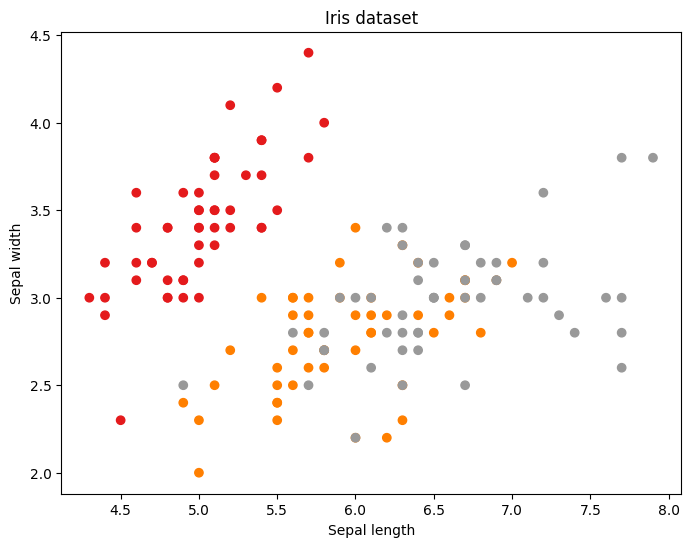

In [7]:

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.show()

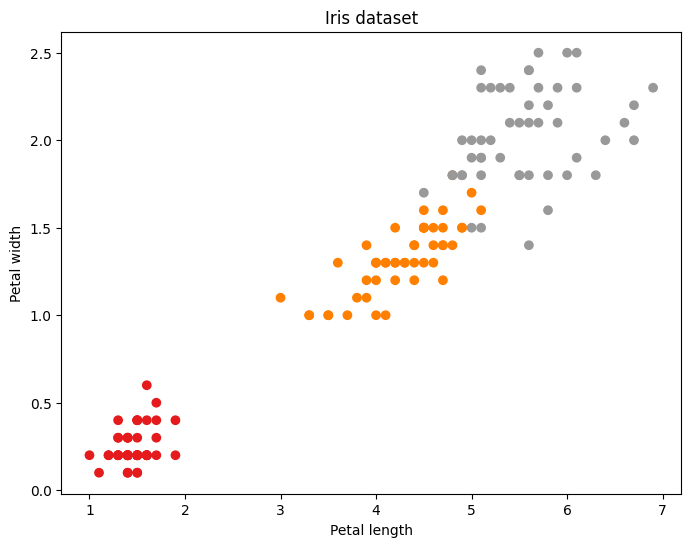

In [8]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=y_true, cmap=plt.cm.Set1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris dataset')
plt.show()

# ***Shuffle Dataset***

In [9]:
# Shuffle the data
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y_true = y_true[indices]

# ***Normalize Dataset***

In [10]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ***K-means clustering algorithm***

In [11]:
# Implement K-means algorithm from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def kmeans(X, k, max_iterations):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    for i in range(max_iterations):
        # Assign each data point to the closest centroid 
        distances = np.zeros((n_samples, k))
        for j in range(k):
            distances[:,j] = [euclidean_distance(X[l], centroids[j]) for l in range(n_samples)]
        cluster_assignment = np.argmin(distances, axis=1)
        # Update centroids to be the mean of the data points in each cluster
        for j in range(k):
            centroids[j] = X[cluster_assignment == j].mean(axis=0)
    return centroids, cluster_assignment


In [12]:
centroids, cluster_assignment = kmeans(X_scaled, k=3, max_iterations=100)

# Assign the predicted label to each sample by finding the most common true label in each cluster
y_pred = np.zeros_like(cluster_assignment)
for i in range(3):
    mask = (cluster_assignment == i)
    y_pred[mask] = np.bincount(y_true[mask]).argmax()

# ***Evaluate Model***

In [13]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    accuracy = correct / len(y_true)
    return accuracy

In [14]:
# Evaluate the model using the accuracy measure
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8533333333333334


# ***Plot Result***

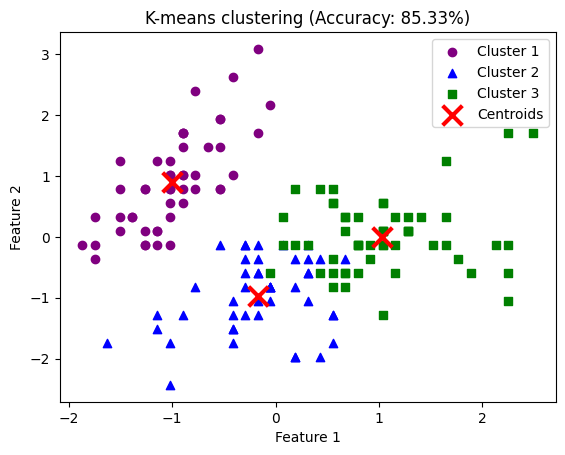

In [15]:
# Plot the clustering result
colors = ['purple', 'blue', 'green']
markers = ['o', '^', 's']

for i in range(3):
    plt.scatter(X_scaled[y_pred == i, 0], X_scaled[y_pred == i, 1], color=colors[i], marker=markers[i], label='Cluster {}'.format(i+1))

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.legend()
plt.title('K-means clustering (Accuracy: {:.2f}%)'.format(accuracy * 100))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()